
###  <h1 style="color:#20B2AA">Classficion</h1> 


In [1]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for plotting and visualozing data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.stem import PorterStemmer

from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
data=pd.read_csv('fetal_health.csv')

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


###  <span style="color:#20B2AA">Features</span> 

 
<span >
<h10><b style="color:#20B2AA">baseline value -</b> FHR baseline (beats per minute)</h10>
    <br>
<h10><b style="color:#20B2AA">accelerations -</b> Number of accelerations per second</h10>
    <br>
<h10><b style="color:#20B2AA">fetal_movement-</b> Number of fetal movements per second</h10>
    <br>
<h10><b style="color:#20B2AA">uterine_contractions -</b> Number of uterine contractions per second</h10>
    <br>
<h10><b style="color:#20B2AA">light_decelerations - </b>Number of light decelerations per second</h10>
    <br>
<h10><b style="color:#20B2AA">severe_decelerations - </b> Number of severe decelerations per second</h10>
    <br>
<h10><b style="color:#20B2AA">prolongued_decelerations - </b> Number of prolonged decelerations per second</h10>
    <br>
<h10><b style="color:#20B2AA">abnormal_short_term_variability - </b> Percentage of time with abnormal short term variability</h10>
    <br>
<h10><b style="color:#20B2AA">mean_value_of_short_term_variability - </b> Mean value of short term variability</h10>
    <br>
<h10><b style="color:#20B2AA">percentage_of_time_with_abnormal_long_term_variability - </b> Percentage of time with abnormal long term variability</h10>
    <br>
<h10><b style="color:#20B2AA">mean_value_of_long_term_variability - </b> Mean value of long term variability</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_width - </b> Width of FHR histogram</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_min - </b> Minimum (low frequency) of FHR histogram</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_max - </b> Maximum (high frequency) of FHR histogram</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_number_of_peaks - </b> Number of histogram peaks</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_number_of_zeroes - </b> Number of histogram zeros</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_mode - </b> Histogram mode</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_mean - </b> Histogram mean</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_median - </b> Histogram median</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_variance - </b> Histogram variance</h10>
    <br>
<h10><b style="color:#20B2AA">histogram_tendency - </b> Histogram tendency</h10>
    <br>
<h5>Target</h5>
<h10>
<b style="color:#20B2AA">fetal_health - </b> Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)
  </h10>
</span >

In [6]:
#checking how many eath ... thare have in 
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

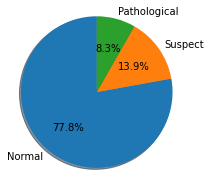

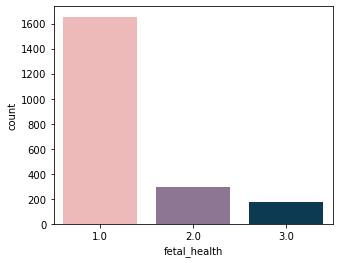

In [7]:
fig = plt.figure(figsize=(3,3))
labels = 'Normal', 'Suspect', 'Pathological' 
sizes = [len(data[data['fetal_health']==1]), len(data[data['fetal_health']==2]), len(data[data['fetal_health']==3])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  


colours=["#f7b2b0","#8f7198", "#003f5c"]
a4_dims = (5, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,data= data, x="fetal_health",palette=colours)
plt.show()

<h2 style="color:#77a8a8">Top 10 importend Feature</h2> 



<h4> 3 features looks most important ones as</h4>
<br style=" list-style-type: space-counter;">prolongued_decelerations</br>
<br>*abnormal_short_term_variability</br>
<br>*percentage_of_time_with_abnormal_long_term_variability</br>


[0.04815516 0.06966026 0.02659456 0.05260116 0.0172129  0.00210804
 0.06610922 0.11740351 0.06008743 0.12684181 0.03660079 0.03971879
 0.03610273 0.03107417 0.0229077  0.01040821 0.05807215 0.06218026
 0.05779482 0.03549172 0.02287459]


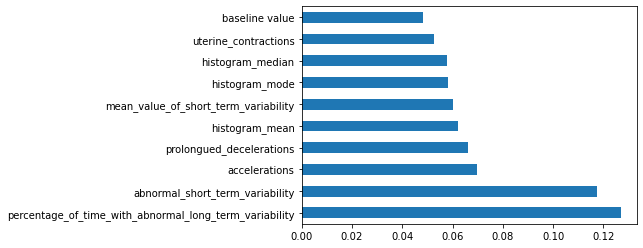

In [8]:

colours=["#f7b2b0","#8f7198", "#003f5c"]
X = data.iloc[:,0:21]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
def correlation_heatmap(train):
    correlations = train.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.001f', cmap="YlGnBu",
                square=True, linewidths=.006, annot=True, cbar_kws={"shrink": .70}
                )
    
    plt.show()


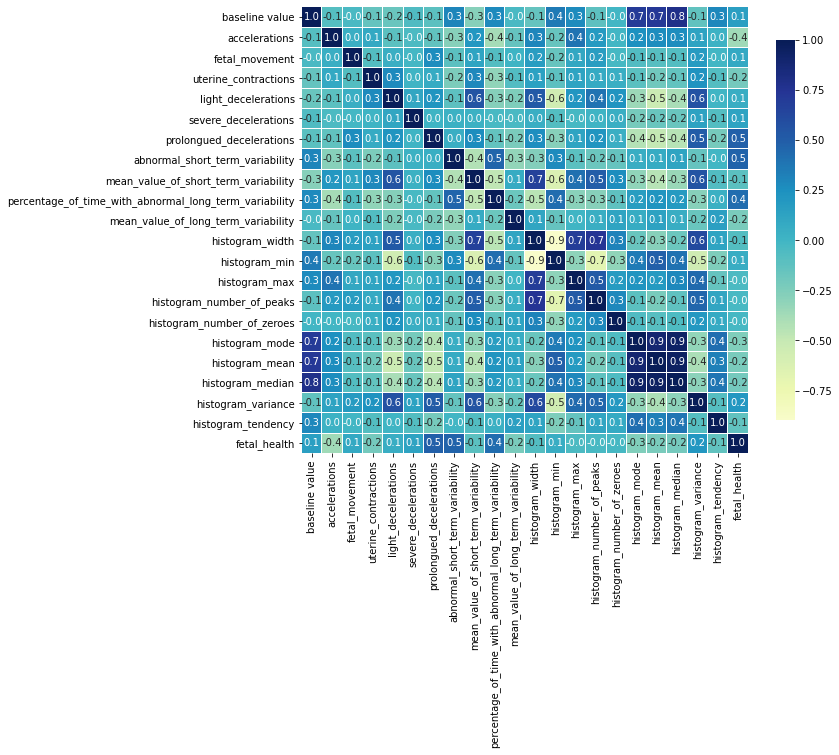

In [9]:
correlation_heatmap(data)

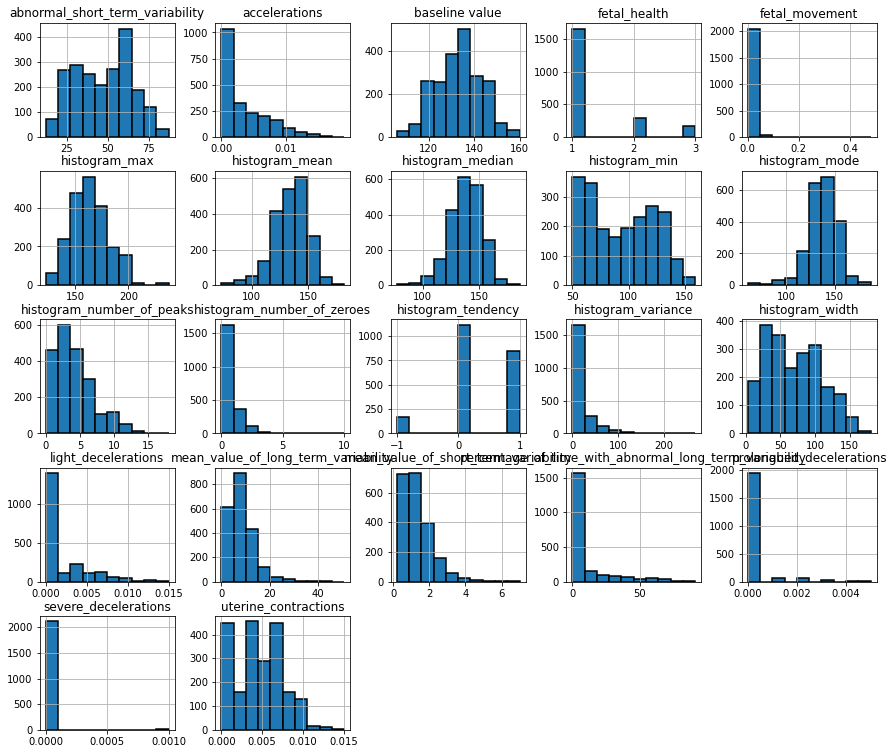

In [10]:
data.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(15,13)
plt.show()

In [11]:
#Easy to see that veil-type is useless
del data['severe_decelerations']

### <h2 style="color:#77a8a8">Cleining the data</h2>

In [12]:
print(data.shape,"befor delited duplicat  value")
data.drop_duplicates(inplace=True)
print(data.shape,"afer delited duplicat  value")

(2126, 21) befor delited duplicat  value
(2113, 21) afer delited duplicat  value


In [13]:
##Missing Values

In [14]:
print(data.isnull().any())
print("Thare are not null value")

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes                                False
histogram_mode                          

### <h2 style="color:#77a8a8">Modeling</h2>

<h10>devided the data into training and testing</h10>

In [15]:

X=data[['baseline value', 'accelerations' ,'fetal_movement','uterine_contractions',
 'light_decelerations' ,'prolongued_decelerations',
 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability' ,'histogram_width' ,'histogram_min',
 'histogram_max', 'histogram_number_of_peaks' ,'histogram_number_of_zeroes',
 'histogram_mode', 'histogram_mean' ,'histogram_median', 'histogram_variance',
 'histogram_tendency']]
Y=data['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.6,random_state = 0)

In [16]:
X_train.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,133.478295,0.002977,0.008220,0.004365,0.001849,0.000163,47.460142,1.325493,10.142068,8.316338,69.605367,93.775059,163.380426,3.999211,0.306235,137.300710,134.560379,138.119179,18.307814,0.330702
std,9.843890,0.003834,0.040071,0.002967,0.002952,0.000604,17.310672,0.875688,18.642102,5.781980,38.645027,29.635821,17.458292,2.942176,0.703849,16.339227,15.657676,14.388236,28.842739,0.613459
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,35.000000,66.000000,151.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.001000,0.000000,0.004000,0.000000,0.000000,50.000000,1.200000,0.000000,7.500000,67.000000,94.000000,161.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.005000,0.003000,0.007000,0.003000,0.000000,61.000000,1.700000,11.000000,11.000000,99.000000,120.000000,174.000000,6.000000,0.000000,148.000000,146.000000,148.000000,23.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.005000,86.000000,6.300000,91.000000,50.700000,180.000000,159.000000,238.000000,16.000000,10.000000,187.000000,173.000000,176.000000,269.000000,1.000000


<h10>Dummy Classifier</h10>

In [17]:
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
dummy_predictions = dummy_clf.predict(X_test)

print("Accuracy score of dummy classifier: {}".format(accuracy_score(dummy_predictions,y_test)))

Accuracy score of dummy classifier: 0.7943262411347518


In [19]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant =1)
                              
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score) 


In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import seaborn as sns
import matplotlib.pyplot as graph
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from IPython.display import display

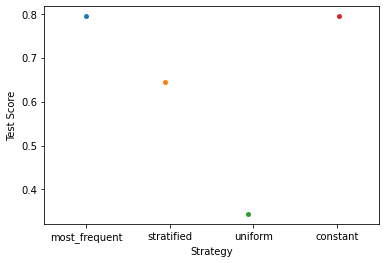

In [21]:

# Baseline (AUC should be 0.5 because we're guessing even though the accuracies are different)
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    dummy_clf.predict(X_train)
    dummy_clf.score(X_train, y_train)
ax = sns.stripplot(strategies, test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

In [22]:
###classification_report for dummi clasificition

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dummy_predictions))
print(classification_report(y_test, dummy_predictions))

[[672   0   0]
 [109   0   0]
 [ 65   0   0]]
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.89       672
         2.0       0.00      0.00      0.00       109
         3.0       0.00      0.00      0.00        65

    accuracy                           0.79       846
   macro avg       0.26      0.33      0.30       846
weighted avg       0.63      0.79      0.70       846



C:\Users\inaam\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#knn

In [24]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

<h5>The best K Neighbors</h5>

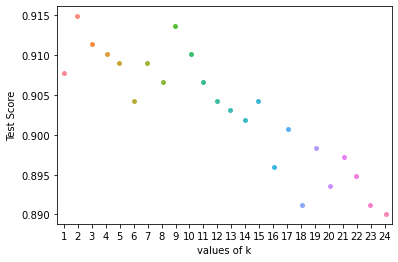

In [25]:
from sklearn.neighbors import KNeighborsClassifier
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(1, 25): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 
ax = sns.stripplot(K, test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show() 

<h5>what are the best k-Neighbor</h5>

In [26]:


#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9148936170212766


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[660  10   2]
 [ 45  62   2]
 [  7   6  52]]
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       672
         2.0       0.79      0.57      0.66       109
         3.0       0.93      0.80      0.86        65

    accuracy                           0.91       846
   macro avg       0.88      0.78      0.83       846
weighted avg       0.91      0.91      0.91       846



### <h2 style="color:#77a8a8">Semester b</h2>


### <h10 style="color:#20B2AA">Last semester the best model was KNN</h10>

In [32]:
print(" 'with Accuracy:",metrics.accuracy_score(y_test, y_pred))

 'with Accuracy: 0.9148936170212766


In [28]:
##svm With cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8877068557919622

In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.01


0.87 accuracy with a standard deviation of 0.01


In [31]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X_test, y_test, cv=cv)

array([0.9015748 , 0.89370079, 0.88976378, 0.90551181, 0.90551181])

In [32]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.9196217494089834

In [43]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [53]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [58]:
from sklearn.metrics import accuracy_score
bstmodel=0;##save the y perd of the best model
yPe=0;
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    if acc> bstmodel:
        yPe=y_pred
        bstmodel=acc
    print(clf.__class__.__name__,acc )

LogisticRegression 0.8817966903073287
RandomForestClassifier 0.9408983451536643
SVC 0.8711583924349882
VotingClassifier 0.8995271867612293


In [59]:
print("RandomForestClassifier best model")

RandomForestClassifier best model


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yPe))
print(classification_report(y_test, yPe))

[[658  13   1]
 [ 23  83   3]
 [  5   5  55]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       672
         2.0       0.82      0.76      0.79       109
         3.0       0.93      0.85      0.89        65

    accuracy                           0.94       846
   macro avg       0.90      0.86      0.88       846
weighted avg       0.94      0.94      0.94       846

